In [0]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from keras.utils import Sequence
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
drive.mount('/content/drive') #mouting drive
path = 'drive/My Drive/Capstone/'
os.chdir(path) #changing the current directory path to the project direcotry where the dataset is available
path = os.getcwd() # directory path of all the images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls

data				  sample
EDA_data_without_duplicates.xlsx  sample.npy
ImageNames.pkl			  stage_2_detailed_class_info.csv
metafile.csv			  stage_2_train_images
metafile.gsheet			  stage_2_train_images.zip
Overall_data.pkl		  stage_2_train_labels.csv


In [0]:
class DataGenerator(Sequence):
    """Generates data for Keras
    Sequence based data generator. Suitable for building data generator for training and prediction.
    """
    def __init__(self, list_IDs, image_path, mask_path, batch_size=32, dim=(1024, 1024),n_channels=1, shuffle=True,resize=False):
        """Initialization
        self.list_IDs = List of all unique patient Ids
        self.image_path = path to image folder
        self.mask_path = path to mask folder
        self.batch_size = batch_size
        self.dim = dimenstion for each input image
        self.n_channels = no.of channels per image
        self.resize = if true, will resize the input image to self.dim
        self.shuffle = True to shuffle label indexes after every epoch
        """
        self.list_IDs = list_IDs
        self.image_path = image_path
        self.mask_path = mask_path
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.resize = resize
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch
        :return: number of batches per epoch
        """
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        if len(list_IDs_temp)==0:
          print('Trying to access an empty batch. No image left to iterate over. Try changing the batch index')
          return None
        else:
          # Generate data
          X, y = self.__pixel_generation(list_IDs_temp)

          return X, y

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __pixel_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim)
        ''' Initialization
         *self.dim is a variable length parameter. It can vary based on the size of image'''
        
        x_image = np.empty((self.batch_size, *self.dim))
        y_mask = np.empty((self.batch_size, *self.dim))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            
            if self.resize == True:
              x_frame = Image.open(self.image_path + ID + '.png').resize((self.dim[0],self.dim[1]),Image.ANTIALIAS)
              y_frame = Image.open(self.mask_path + ID + '.png').resize((self.dim[0],self.dim[1]),Image.ANTIALIAS)
            else:
              x_frame = Image.open(self.image_path + ID + '.png')
              y_frame = Image.open(self.mask_path + ID + '.png')
            
            # Store images
            x_image[i,] = np.array(x_frame)
            # Store masks           
            y_mask[i,] = np.array(y_frame)

        return x_image, y_mask

In [0]:
im_path = '/content/drive/My Drive/Capstone/data/images/'
mask_path = '/content/drive/My Drive/Capstone/data/masks/'
train_list = os.listdir(im_path)



In [0]:
len(train_list)
train_images = list(map(lambda x: str(x).replace('.png',''),train_list))

In [0]:
train_gen = DataGenerator(list_IDs =train_images , image_path = im_path, mask_path=mask_path,dim=(1024,1024),batch_size=4,resize=True)
train_gen[2][0][0].shape

(1024, 1024)

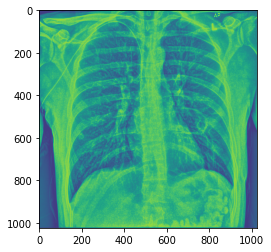

In [0]:
plt.imshow(train_gen[2][0][0])


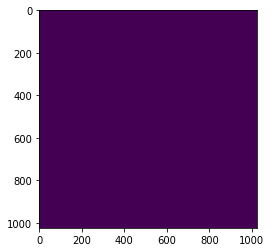

In [0]:
plt.imshow(train_gen[2][1][0])